In [25]:
import pandas as pd
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('countries.csv', index_col='Country')

In [27]:
df.head()

,Growth,Life,IMR,TFR,GDP
Country,,,,,
Albania,1.2,69.2,30,2.9,659.91
Argentina,1.2,68.6,24,2.8,4343.04
Australia,1.1,74.7,7,1.9,17529.98
Austria,1.0,73.0,7,1.5,20561.88
Benin,3.2,45.9,86,7.1,398.21


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Albania to Zimbabwe
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Growth  25 non-null     float64
 1   Life    25 non-null     float64
 2   IMR     25 non-null     int64  
 3   TFR     25 non-null     float64
 4   GDP     25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
countries = df.index
dfs = ss.fit_transform(df)

cols = list(df)
dfs = pd.DataFrame(dfs, columns=cols, index=countries)
dfs

,Growth,Life,IMR,TFR,GDP
Country,,,,,
Albania,-0.295512,0.550175,-0.406422,-0.302424,-0.717292
Argentina,-0.295512,0.481575,-0.571187,-0.356429,-0.252941
Australia,-0.372468,1.179012,-1.038023,-0.842468,1.409605
Austria,-0.449424,0.984644,-1.038023,-1.058486,1.791852
Benin,1.243613,-2.113807,1.131390,1.965759,-0.750286
Bolivia,0.627963,-0.764666,0.829320,0.723659,-0.698093
Brazil,-0.064643,-0.044362,0.362484,-0.302424,-0.394627
Cambodia,0.935788,-1.633604,1.955218,0.993680,-0.788212
China,-0.372468,0.264340,-0.021969,-0.788464,-0.757460


In [30]:
dfst = dfs.T
corr = dfst.corr()
corr

Country,Albania,Argentina,Australia,Austria,Benin,Bolivia,Brazil,Cambodia,China,Colombia,...,Iran,Italy,Malawi,Netherlands,Pakistan,Papua,Peru,Romania,USA,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Albania,1.000000,0.851284,0.232427,0.076760,-0.537596,-0.326400,0.213177,-0.494843,0.756020,0.819419,...,0.021753,0.162986,-0.531710,0.175931,-0.185434,-0.424707,0.219650,0.588182,0.007956,-0.392568
Argentina,0.851284,1.000000,0.697660,0.571073,-0.837612,-0.753307,-0.191455,-0.874725,0.530472,0.573592,...,0.142462,0.604542,-0.891752,0.645273,-0.637965,-0.800652,-0.298858,0.684490,0.521692,-0.659704
Australia,0.232427,0.697660,1.000000,0.986082,-0.899334,-0.986707,-0.500712,-0.945246,0.086395,-0.022578,...,0.039056,0.953319,-0.946301,0.993015,-0.983316,-0.960657,-0.775528,0.577080,0.973420,-0.763818
Austria,0.076760,0.571073,0.986082,1.000000,-0.848710,-0.959460,-0.502845,-0.879440,0.002163,-0.145331,...,-0.018541,0.956925,-0.880620,0.991378,-0.984602,-0.924052,-0.802783,0.517567,0.993894,-0.729960
Benin,-0.537596,-0.837612,-0.899334,-0.848710,1.000000,0.940506,0.129707,0.910379,-0.497242,-0.276013,...,0.234902,-0.892569,0.947667,-0.896408,0.915578,0.972236,0.435846,-0.821916,-0.797099,0.859366
Bolivia,-0.326400,-0.753307,-0.986707,-0.959460,0.940506,1.000000,0.439334,0.962958,-0.173328,-0.008004,...,0.013622,-0.972062,0.962978,-0.986815,0.983737,0.964953,0.713141,-0.697608,-0.942257,0.853430
Brazil,0.213177,-0.191455,-0.500712,-0.502845,0.129707,0.439334,1.000000,0.501114,0.728582,0.477474,...,-0.791085,-0.411999,0.396938,-0.475121,0.400588,0.272793,0.909103,0.136803,-0.583061,0.188515
Cambodia,-0.494843,-0.874725,-0.945246,-0.879440,0.910379,0.962958,0.501114,1.000000,-0.193529,-0.160260,...,-0.181018,-0.880804,0.990694,-0.919029,0.901712,0.936569,0.691699,-0.653663,-0.862324,0.789995
China,0.756020,0.530472,0.086395,0.002163,-0.497242,-0.173328,0.728582,-0.193529,1.000000,0.801805,...,-0.609337,0.096752,-0.298996,0.073424,-0.134136,-0.354132,0.554448,0.600082,-0.103008,-0.309309


In [31]:
## We will create a matrix of dissimilarity (0 - 2). Large value indicates dissimilar countries.

corr = corr.copy()
corr = 1-corr
corr

Country,Albania,Argentina,Australia,Austria,Benin,Bolivia,Brazil,Cambodia,China,Colombia,...,Iran,Italy,Malawi,Netherlands,Pakistan,Papua,Peru,Romania,USA,Zimbabwe
Country,,,,,,,,,,,,,,,,,,,,,
Albania,0.000000,0.148716,0.767573,0.923240,1.537596,1.326400,0.786823,1.494843,0.243980,0.180581,...,0.978247,0.837014,1.531710,0.824069,1.185434,1.424707,0.780350,0.411818,0.992044,1.392568
Argentina,0.148716,0.000000,0.302340,0.428927,1.837612,1.753307,1.191455,1.874725,0.469528,0.426408,...,0.857538,0.395458,1.891752,0.354727,1.637965,1.800652,1.298858,0.315510,0.478308,1.659704
Australia,0.767573,0.302340,0.000000,0.013918,1.899334,1.986707,1.500712,1.945246,0.913605,1.022578,...,0.960944,0.046681,1.946301,0.006985,1.983316,1.960657,1.775528,0.422920,0.026580,1.763818
Austria,0.923240,0.428927,0.013918,0.000000,1.848710,1.959460,1.502845,1.879440,0.997837,1.145331,...,1.018541,0.043075,1.880620,0.008622,1.984602,1.924052,1.802783,0.482433,0.006106,1.729960
Benin,1.537596,1.837612,1.899334,1.848710,0.000000,0.059494,0.870293,0.089621,1.497242,1.276013,...,0.765098,1.892569,0.052333,1.896408,0.084422,0.027764,0.564154,1.821916,1.797099,0.140634
Bolivia,1.326400,1.753307,1.986707,1.959460,0.059494,0.000000,0.560666,0.037042,1.173328,1.008004,...,0.986378,1.972062,0.037022,1.986815,0.016263,0.035047,0.286859,1.697608,1.942257,0.146570
Brazil,0.786823,1.191455,1.500712,1.502845,0.870293,0.560666,0.000000,0.498886,0.271418,0.522526,...,1.791085,1.411999,0.603062,1.475121,0.599412,0.727207,0.090897,0.863197,1.583061,0.811485
Cambodia,1.494843,1.874725,1.945246,1.879440,0.089621,0.037042,0.498886,0.000000,1.193529,1.160260,...,1.181018,1.880804,0.009306,1.919029,0.098288,0.063431,0.308301,1.653663,1.862324,0.210005
China,0.243980,0.469528,0.913605,0.997837,1.497242,1.173328,0.271418,1.193529,0.000000,0.198195,...,1.609337,0.903248,1.298996,0.926576,1.134136,1.354132,0.445552,0.399918,1.103008,1.309309


In [32]:
from sklearn import manifold

mds = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=4)

results = mds.fit(corr.values)
country = corr.columns
coords = results.embedding_

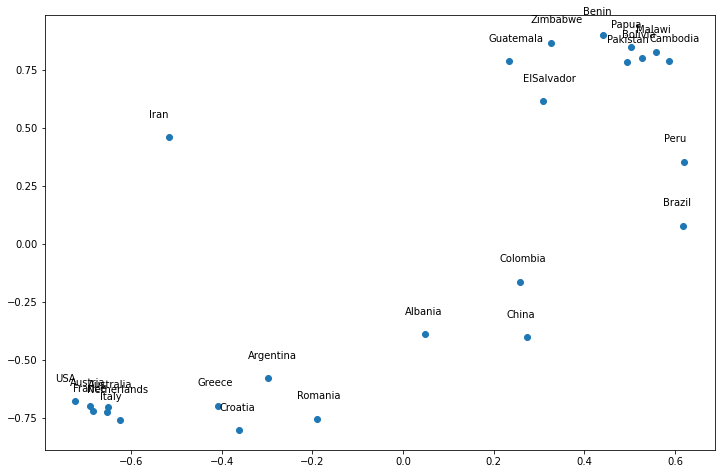

In [33]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(coords[:,0], coords[:,1])
for label, x, y in zip(country, coords[:,0], coords[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-20, 20), textcoords='offset points')
plt.show()

In [35]:
## Kruskal's stress (or stress formula 1)
stress = results.stress_
stress1 = np.sqrt(stress / (0.5 * np.sum(corr.values**2)))
print("Kruskal's Stress :")
print("[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]")
print(stress1)
print("")

Kruskal's Stress :
[Poor > 0.2 > Fair > 0.1 > Good > 0.05 > Excellent > 0.025 > Perfect > 0.0]
0.10539948218250739

